<a href="https://colab.research.google.com/github/gundasai/deeplearning/blob/master/NASNetLarge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tamato 


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import os
os.chdir('/content/drive/My Drive/PlantVillage')
os.getcwd()

'/content/drive/My Drive/PlantVillage'

### Datasets and Pre Processing

In [3]:
import keras
import keras
from keras.preprocessing import image
import numpy as np
import pandas as pd
x=[]
y=[]
count=0
size=0
path='/content/drive/My Drive/PlantVillage'
for i in os.listdir(path):
  for j in os.listdir(os.path.join(path,i)):
    print(os.path.join(path,i,j))
    img=image.load_img(os.path.join(path,i,j),color_mode='rgb')
    img=image.img_to_array(img)
    img=img/255.0
    x.append(img)
    y.append(count)
    size=size+1
    print(os.path.join(path,i,j),count)
    if size>=373:
      break
  count=count+1
  size=0
x=np.array(x)
y=np.array(y)

Using TensorFlow backend.


Streaming output truncated to the last 5000 lines.
/content/drive/My Drive/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09e129d3-0f7f-4217-844a-073593ec3c4e___YLCV_NREC 2848.JPG 3
/content/drive/My Drive/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/04e0bd12-ec63-432a-9b4a-23e23bb6d2be___YLCV_GCREC 2208.JPG
/content/drive/My Drive/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/04e0bd12-ec63-432a-9b4a-23e23bb6d2be___YLCV_GCREC 2208.JPG 3
/content/drive/My Drive/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/2cc6d499-bf92-48c6-b0f9-6d9ef3c2f76e___UF.GRC_YLCV_Lab 03271.JPG
/content/drive/My Drive/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/2cc6d499-bf92-48c6-b0f9-6d9ef3c2f76e___UF.GRC_YLCV_Lab 03271.JPG 3
/content/drive/My Drive/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/6a34e6d5-2acf-4d90-9e06-40368b092223___YLCV_NREC 2206.JPG
/content/drive/My Drive/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/6a34e6d5-2acf-4d90-9e06-40368b092223___YLCV_NREC 2206.

In [0]:
from sklearn.utils import shuffle
(x,y)=shuffle(x,y)

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

In [6]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(2499, 256, 256, 3)
(2499,)
(1231, 256, 256, 3)
(1231,)
4
float32
4
float32
4
float32


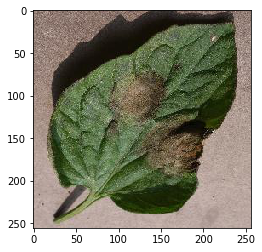

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='brg')

In [8]:
print(xtrain.shape[0])
print(xtrain.shape[1])
print(xtrain.shape[2])

2499
256
256


In [0]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [10]:
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

1.0 1.0
0.0 0.0
9 9
0 0
0.44405645
0.18657236
2.9797745 2.9797745
-2.3800764 -2.3800764


In [0]:
xtrain = xtrain.reshape(xtrain.shape[0],256,256,3)
xtest =  xtest.reshape(xtest.shape[0],256,256,3)

In [12]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### LeNet Model

In [0]:
import keras
from keras import models
from keras import layers

In [29]:
from keras.applications.nasnet import NASNetLarge
from keras.applications.resnet_v2 import ResNet152V2
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D,Input
from keras import backend as K

# create the base pre-trained model
input_tensor = Input(shape=(256, 256, 3))
base_model = NASNetLarge(input_tensor=input_tensor,weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(10, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
#for layer in base_model.layers:
#    layer.trainable = False

model.summary()




343613440/343610240 [==============================] - 23s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 127, 127, 96) 2592        input_2[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 127, 127, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 127, 127, 96) 0           stem_bn1[0][0]                   
______________________

### Visualization of randomly initialized filters

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

### Compile and Training the model

In [31]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy' ,metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=10,epochs=10, verbose=1)

Train on 1999 samples, validate on 500 samples
Epoch 1/10
1999/1999 [==============================] - 445s 223ms/step - loss: 1.3635 - acc: 0.5613 - val_loss: 0.6603 - val_acc: 0.7840
Epoch 2/10
1999/1999 [==============================] - 345s 173ms/step - loss: 0.3260 - acc: 0.9005 - val_loss: 0.3060 - val_acc: 0.8960
Epoch 3/10
1999/1999 [==============================] - 345s 173ms/step - loss: 0.1275 - acc: 0.9600 - val_loss: 0.2662 - val_acc: 0.9160
Epoch 4/10
1999/1999 [==============================] - 345s 173ms/step - loss: 0.0793 - acc: 0.9795 - val_loss: 0.2512 - val_acc: 0.9160
Epoch 5/10
1999/1999 [==============================] - 345s 173ms/step - loss: 0.0495 - acc: 0.9870 - val_loss: 0.2358 - val_acc: 0.9320
Epoch 6/10
1999/1999 [==============================] - 346s 173ms/step - loss: 0.0273 - acc: 0.9940 - val_loss: 0.2027 - val_acc: 0.9360
Epoch 7/10
1999/1999 [==============================] - 346s 173ms/step - loss: 0.0322 - acc: 0.9915 - val_loss: 0.2340 - val

### Evaluate

In [32]:
model.evaluate(xtest,ytest)

1231/1231 [==============================] - 50s 40ms/step


[0.18530528833991283, 0.9366368805848904]

### Prediction

In [18]:
pred=model.predict(xtest[0].reshape(1,256,256,3))
print(pred)
print(pred.argmax())

[[3.5415383e-06 1.7053838e-04 1.0803409e-06 1.8464478e-08 1.4076819e-06
  2.3762971e-07 6.3615144e-09 9.9982244e-01 2.3966606e-08 7.4464123e-07]]
7


In [19]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

1231/1231 [==============================] - 27s 22ms/step
0.17239704240298098
0.9455727051177905


### Loss and Accuracy Curves

In [0]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
xc=range(len(train_loss))

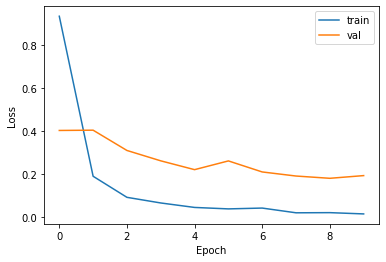

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

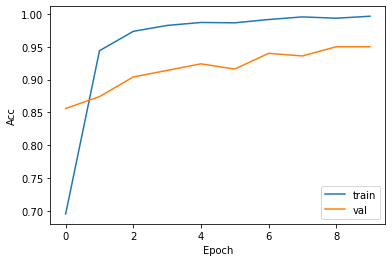

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [23]:
%matplotlib inline
for i in range(10):
    pred = model.predict(xtest[i].reshape(1, 256, 256, 3))
    print(""+str(i+1)+" Actual is "+ " " + str(ytest[i])+" Predicted is "+str(pred.argmax()))

1 Actual is  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] Predicted is 7
2 Actual is  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted is 2
3 Actual is  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] Predicted is 6
4 Actual is  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Predicted is 4
5 Actual is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 0
6 Actual is  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] Predicted is 7
7 Actual is  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] Predicted is 3
8 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 9
9 Actual is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 0
10 Actual is  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] Predicted is 7


In [24]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.93      1.00      0.97       112
     class 1       0.86      0.94      0.90       130
     class 2       0.89      1.00      0.94       109
     class 3       0.97      1.00      0.99       116
     class 4       0.91      0.97      0.94       120
     class 5       0.97      0.90      0.94       126
     class 6       0.98      0.96      0.97       127
     class 7       0.99      0.86      0.92       148
     class 8       0.97      0.85      0.91       127
     class 9       0.98      1.00      0.99       116

    accuracy                           0.95      1231
   macro avg       0.95      0.95      0.95      1231
weighted avg       0.95      0.95      0.95      1231



In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[112   0   0   0   0   0   0   0   0   0]
 [  0 122   3   1   2   1   0   1   0   0]
 [  0   0 109   0   0   0   0   0   0   0]
 [  0   0   0 116   0   0   0   0   0   0]
 [  0   0   1   0 117   0   0   0   2   0]
 [  2   3   2   0   1 114   2   0   1   1]
 [  0   2   0   2   0   1 122   0   0   0]
 [  1  12   6   0   0   0   0 128   0   1]
 [  5   3   2   0   8   1   0   0 108   0]
 [  0   0   0   0   0   0   0   0   0 116]]


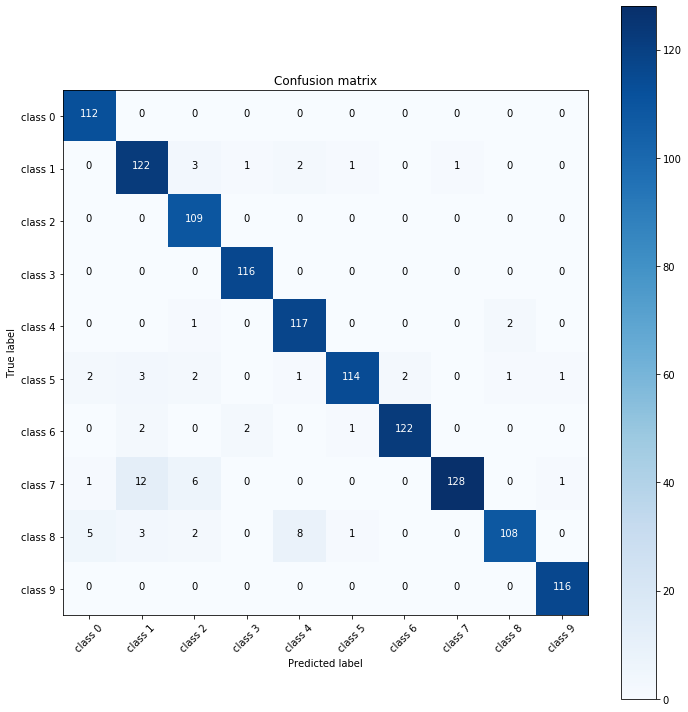

In [26]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.show()

## Visualization

In [27]:
for layer in model.layers:
  print(layer)

In [28]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(xtrain[10].reshape(1,256,256,3))

InvalidArgumentError: ignored

In [0]:
def display_activation(activations, col_size, row_size, act_index):
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [0]:
len(activations)
#activations
print(activations[0].shape)
print(activations[1].shape)
print(activations[2].shape)
print(activations[3].shape)
print(activations[4].shape)
print(activations[5].shape)
print(activations[6].shape)
print(activations[7].shape)

In [0]:
print(activations[0].shape)
display_activation(activations,3,2,0)

In [0]:
print(activations[1].shape)
display_activation(activations,3,2,1)

In [0]:
print(activations[2].shape)
display_activation(activations,4,4,2)

In [0]:
print(activations[3].shape)
display_activation(activations,4,4,3)

In [0]:
act_dense_3  = activations[7]
 
y = act_dense_3[0]
x = range(len(y))
plt.xticks(x)
plt.bar(x, y)
plt.show()

In [0]:
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]
 
col_size = 3
row_size = 2
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

In [0]:
print(weight_conv2d_1[:,:,0])
print("")
print(weight_conv2d_1[:,:,1])
print("")
print(weight_conv2d_1[:,:,2])
print("")
print(weight_conv2d_1[:,:,3])
print("")
print(weight_conv2d_1[:,:,4])
print("")
print(weight_conv2d_1[:,:,5])

In [0]:
weight_conv2d_2 = model.layers[2].get_weights()[0][:,:,0,:]
col_size = 4
row_size = 4
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_2[:,:,filter_index],cmap="gray")
    filter_index += 1

In [0]:
print(weight_conv2d_2[:,:,0])
print("")
print(weight_conv2d_2[:,:,1])
print("")
print(weight_conv2d_2[:,:,2])
print("")
print(weight_conv2d_2[:,:,3])
print("")
print(weight_conv2d_2[:,:,4])
print("")
print(weight_conv2d_2[:,:,5])
print("")
print(weight_conv2d_2[:,:,6])
print("")
print(weight_conv2d_2[:,:,7])
print("")
print(weight_conv2d_2[:,:,8])
print("")
print(weight_conv2d_2[:,:,9])
print("")
print(weight_conv2d_2[:,:,10])
print("")
print(weight_conv2d_2[:,:,11])
print("")
print(weight_conv2d_2[:,:,12])
print("")
print(weight_conv2d_2[:,:,13])
print("")
print(weight_conv2d_2[:,:,14])
print("")
print(weight_conv2d_2[:,:,15])